In [1]:
import numpy as np
import pandas as pd
import cv2
import os
import matplotlib.pyplot as plt
import random

from sklearn.model_selection import train_test_split

import tensorflow as tf
config =  tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.compat.v1.Session(config=config)

from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, Sequential, load_model

In [10]:
def read_images(path):
    images = []
    names=[]
    for i in sorted(os.listdir(path),key=len):
        img = cv2.imread(os.path.join(path,i))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img,(224,224))
        images.append(img)
        names.append(i)
    return images,names

In [11]:
src = r'C:\Users\saad\Desktop\Image-Background-Removal\Dataset\Human-Segmentation-Dataset'
inputs = os.path.join(src,'Training_Images')
outputs = os.path.join(src,'Ground_Truth')

In [12]:
in_images,in_names = read_images(inputs)
out_images,out_names = read_images(outputs)

In [13]:
in_images = np.array(in_images)/255.
out_images = np.array(out_images)/255.

[51, 45, 137, 215, 94]


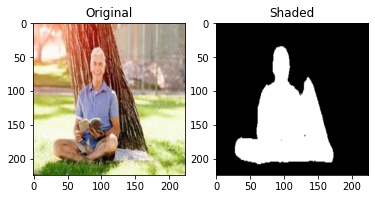

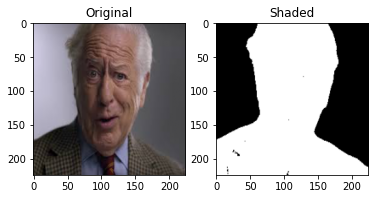

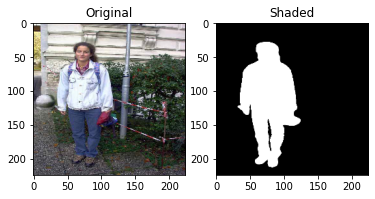

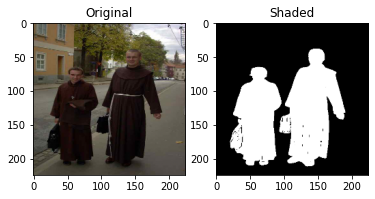

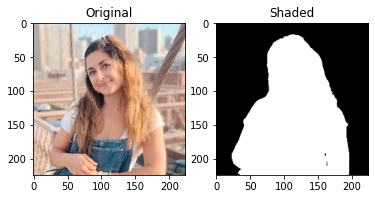

In [14]:
num_test = random.sample(range(0,len(in_images)),5)
print(num_test)
for i in num_test:
    plt.subplot(121)
    plt.imshow(in_images[i])
    plt.title('Original')
    
    plt.subplot(122)
    plt.imshow(out_images[i])
    plt.title('Shaded')
    plt.show()

In [15]:
x_train,x_test,y_train,y_test = train_test_split(in_images,out_images,test_size=0.2,random_state=42)

print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(232, 224, 224, 3) (232, 224, 224, 3)
(58, 224, 224, 3) (58, 224, 224, 3)


In [16]:
in1 = Input(shape=(224, 224, 3 ))

conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(in1)
conv1 = Dropout(0.2)(conv1)
conv1 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool1)
conv2 = Dropout(0.2)(conv2)
conv2 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)

conv3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool2)
conv3 = Dropout(0.2)(conv3)
conv3 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv3)
pool3 = MaxPooling2D((2, 2))(conv3)

conv4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(pool3)
conv4 = Dropout(0.2)(conv4)
conv4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv4)

up1 = concatenate([UpSampling2D((2, 2))(conv4), conv3], axis=-1)
conv5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up1)
conv5 = Dropout(0.2)(conv5)
conv5 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv5)

up2 = concatenate([UpSampling2D((2, 2))(conv5), conv2], axis=-1)
conv6 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up2)
conv6 = Dropout(0.2)(conv6)
conv6 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv6)

up2 = concatenate([UpSampling2D((2, 2))(conv6), conv1], axis=-1)
conv7 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(up2)
conv7 = Dropout(0.2)(conv7)
conv7 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(conv7)
segmentation = Conv2D(3, (1, 1), activation='sigmoid', name='seg')(conv7)

model = Model(inputs=[in1], outputs=[segmentation])

losses = {'seg': 'binary_crossentropy'
    }

metrics = {'seg': ['acc']
        }
model.compile(optimizer="adam", loss = losses, metrics=metrics)


In [17]:
history= model.fit(x_train,y_train,validation_split=0.2,batch_size=2,epochs=100)

Epoch 1/100
93/93 [==============================] - 2s 22ms/step - loss: 0.6228 - acc: 0.3610 - val_loss: 0.5700 - val_acc: 0.4767
Epoch 2/100
93/93 [==============================] - 1s 16ms/step - loss: 0.5694 - acc: 0.3278 - val_loss: 0.4781 - val_acc: 0.7748
Epoch 3/100
93/93 [==============================] - 1s 16ms/step - loss: 0.5441 - acc: 0.3054 - val_loss: 0.4417 - val_acc: 0.4391
Epoch 4/100
93/93 [==============================] - 1s 15ms/step - loss: 0.5165 - acc: 0.3695 - val_loss: 0.4371 - val_acc: 0.3668
Epoch 5/100
93/93 [==============================] - 1s 16ms/step - loss: 0.4612 - acc: 0.4012 - val_loss: 0.4266 - val_acc: 0.2635
Epoch 6/100
93/93 [==============================] - 1s 16ms/step - loss: 0.4526 - acc: 0.3565 - val_loss: 0.4271 - val_acc: 0.3826
Epoch 7/100
93/93 [==============================] - 1s 16ms/step - loss: 0.4431 - acc: 0.3611 - val_loss: 0.4366 - val_acc: 0.5596
Epoch 8/100
93/93 [==============================] - 1s 16ms/step - loss: 0.

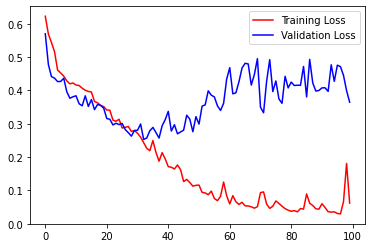

In [19]:
plt.plot(history.history['loss'],'r',label='Training Loss')
plt.plot(history.history['val_loss'],'b',label='Validation Loss')
plt.legend()
plt.show()

In [20]:
preds = model.predict(x_test)

[31, 55, 4, 3, 50]


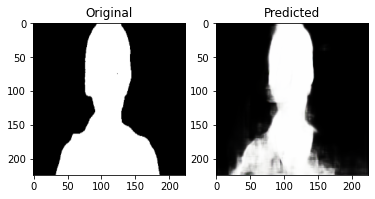

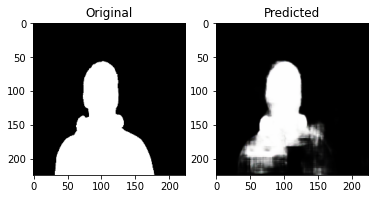

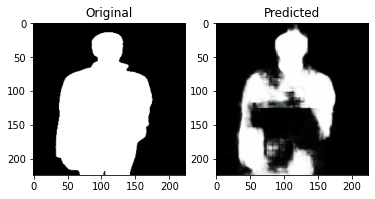

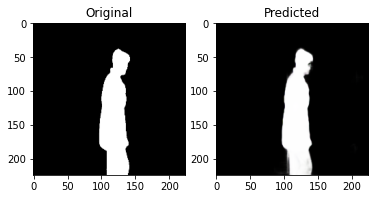

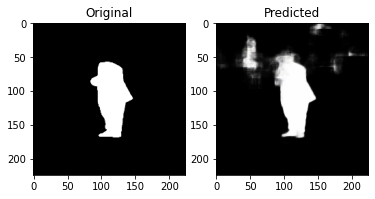

In [27]:
num_test = random.sample(range(0,len(x_test)),5)
print(num_test)
for i in num_test:
    plt.subplot(121)
    plt.imshow(y_test[i])
    plt.title('Original')
    
    plt.subplot(122)
    plt.imshow(preds[i])
    plt.title('Predicted')
    plt.show()